<a href="https://colab.research.google.com/github/tanisha00999/ForceMotorSharePricePrediction/blob/main/ForceMotor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol (AAPL for Apple Inc.)
ticker = "FORCEMOT.BO"

# Define the start and end dates for the historical data
start_date = "2022-01-01"
end_date = "2023-12-31"

# Download the historical stock price data
data = yf.download(ticker, start=start_date, end=end_date)

# Save the data to a CSV file
data.to_csv("Force_Motors_stock_prices.csv")


[*********************100%***********************]  1 of 1 completed


In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt


In [ ]:
# Load the historical stock price data from the CSV file
df = pd.read_csv('Force_Motors_stock_prices.csv')

# Rename the columns to 'ds' and 'y' (Prophet requires this format)
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})

# Convert the 'ds' column to datetime format
df['ds'] = pd.to_datetime(df['ds'])

# Sort the dataframe by date (Prophet expects the data to be sorted by time)
df = df.sort_values(by='ds')


In [ ]:
# Create a Prophet model
model = Prophet()

# Fit the model to the data
model.fit(df)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5pvupyi_/3m5rzq39.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5pvupyi_/lnh53hnj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80239', 'data', 'file=/tmp/tmp5pvupyi_/3m5rzq39.json', 'init=/tmp/tmp5pvupyi_/lnh53hnj.json', 'output', 'file=/tmp/tmp5pvupyi_/prophet_modelt7bovkht/prophet_model-20230804042829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:28:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:28:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=30)  # Change the number of periods as needed

# Make predictions for the future dates
forecast = model.predict(future)


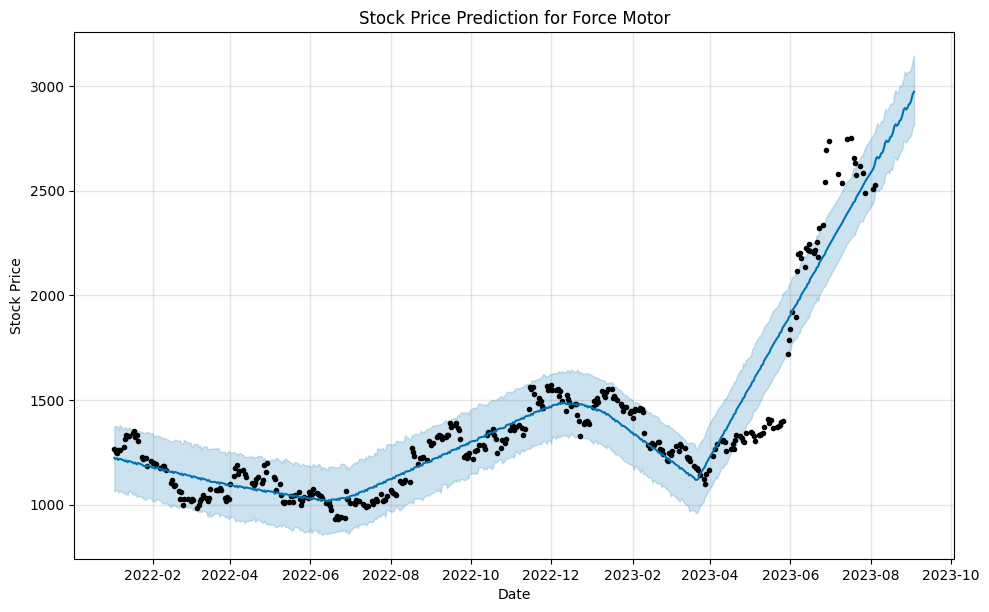

In [ ]:
# Plot the predictions
fig = model.plot(forecast)
plt.title('Stock Price Prediction for Force Motor')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()


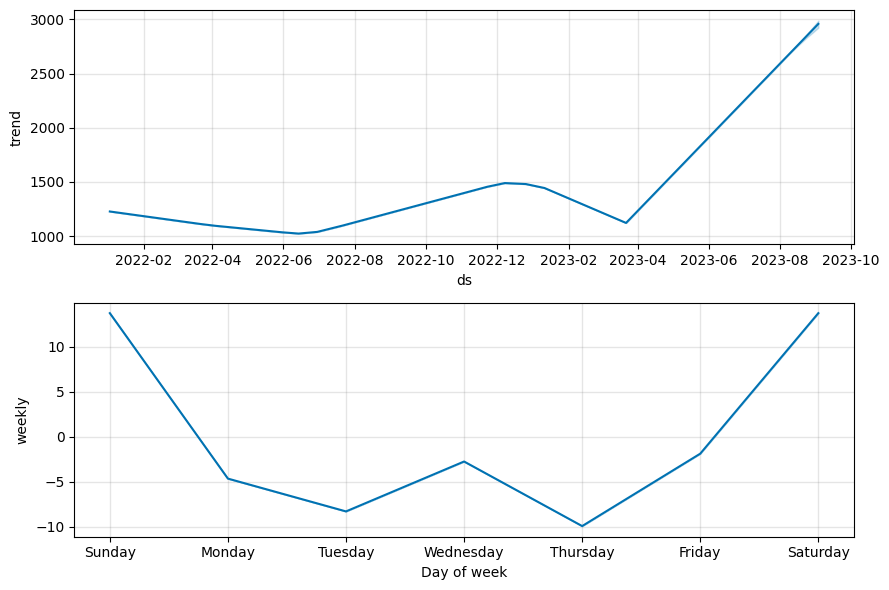

In [ ]:
fig = model.plot_components(forecast)
plt.show()
